In [344]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

parts_analysis = ["#046d8b", "#0190ba", "#004b60", "#e0576a", "#b42a3d", "#9a303e"]


# CPU MLR

In [345]:
df = pd.read_csv('PC_Part_Picker_Datasets\CPU_Data.csv')
#drop GHz from Performance Core Clock and Boost Clock
df['Performance Core Clock'] = df['Performance Core Clock'].str.replace(' GHz', '')
df['Boost Clock'] = df['Boost Clock'].str.replace(' GHz', '')
#change Performance Core Clock and Boost Clock to float
df['Performance Core Clock'] = df['Performance Core Clock'].astype(float)
df['Boost Clock'] = df['Boost Clock'].astype(float)
#remove the spaces from the column names
df.columns = df.columns.str.replace(' ', '_')

In [346]:
x = df[[ 'Core_Count','Performance_Core_Clock' ]]
y = df['Price']

regr = linear_model.LinearRegression()
regr.fit(x, y)

#print out MLR summary
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     37.36
Date:                Sat, 13 Apr 2024   Prob (F-statistic):           1.40e-14
Time:                        18:19:51   Log-Likelihood:                -1423.1
No. Observations:                 210   AIC:                             2852.
Df Residuals:                     207   BIC:                             2862.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -197

In [347]:
#add the residuals to the dataframe
df['residuals'] = y - regr.predict(x)
#move the residuals to the first column
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [348]:
#create a new dataframe called Low Price that contains all the CPUs with a price less than 153.5
Low_Price = df[df['Price'] < 153.5]
#sort the dataframe by residuals in ascending order
Low_Price = Low_Price.sort_values(by='residuals', ascending=True)
Low_Price.head()
#set the best_low_cpu to the first row of the Low_Price dataframe
best_low_cpu = Low_Price.iloc[0]
best_low_cpu

residuals                    -162.773383
Brand                                AMD
Model                     Ryzen 5 4500  
Core_Count                             6
Performance_Core_Clock               3.6
Boost_Clock                          4.1
TDP                                 65 W
Integrated_Graphics                  NaN
Sockets_Supported                    Yes
Rating                                 5
Rating_Count                          11
Price                               78.5
Release_Year                      2020.0
Socket_Type                          AM4
Name: 29, dtype: object

In [349]:
#create a new dataframe called Medium Price that contains all the CPUs with a price more than 153.5 and less than 234.995
Medium_Price = df[(df['Price'] > 153.5) & (df['Price'] < 234.995)]
#sort the dataframe by residuals in ascending order
Medium_Price = Medium_Price.sort_values(by='residuals', ascending=True)
Medium_Price.head()
#set the best_low_cpu to the first row of the Low_Price dataframe
best_medium_cpu = Medium_Price.iloc[0]
best_medium_cpu

residuals                       -194.760463
Brand                                 Intel
Model                     Core i5-12600KF  
Core_Count                               10
Performance_Core_Clock                  3.7
Boost_Clock                             4.9
TDP                                   125 W
Integrated_Graphics                     NaN
Sockets_Supported                       Yes
Rating                                    5
Rating_Count                             46
Price                                160.99
Release_Year                         2021.0
Socket_Type                        LGA 1200
Name: 18, dtype: object

In [350]:
#create a new dataframe called High Price that contains all the CPUs with a price more than 234.995 and less than 360.5525
High_Price = df[(df['Price'] > 234.995) & (df['Price'] < 360.5525)]
#sort the dataframe by residuals in ascending order
High_Price = High_Price.sort_values(by='residuals', ascending=True)
High_Price.head()
#set the best_low_cpu to the first row of the Low_Price dataframe
best_high_cpu = High_Price.iloc[0]
best_high_cpu


residuals                       -167.046733
Brand                                 Intel
Model                     Core i5-14600KF  
Core_Count                               14
Performance_Core_Clock                  3.5
Boost_Clock                             5.3
TDP                                   125 W
Integrated_Graphics                     NaN
Sockets_Supported                       Yes
Rating                                    5
Rating_Count                              3
Price                                279.99
Release_Year                         2023.0
Socket_Type                        LGA 1700
Name: 39, dtype: object

In [351]:
#create a new dataframe called Ultra Price that contains all the CPUs with a price more than 360.5525
Ultra_Price = df[df['Price'] > 360.5525]
#sort the dataframe by residuals in ascending order
Ultra_Price = Ultra_Price.sort_values(by='residuals', ascending=True)
Ultra_Price.head()
#set the best_low_cpu to the first row of the Low_Price dataframe
best_ultra_cpu = Ultra_Price.iloc[0]
best_ultra_cpu


residuals                       -221.866677
Brand                                 Intel
Model                     Core i7-14700KF  
Core_Count                               20
Performance_Core_Clock                  3.4
Boost_Clock                             5.6
TDP                                   125 W
Integrated_Graphics                     NaN
Sockets_Supported                       Yes
Rating                                    5
Rating_Count                              3
Price                                377.56
Release_Year                         2023.0
Socket_Type                        LGA 1700
Name: 25, dtype: object

In [352]:
model = smf.ols(formula='Price ~ Core_Count + Performance_Core_Clock', data=df)
results_formula = model.fit()
#results_formula.params

x_surf, y_surf = np.meshgrid(np.linspace(df.Core_Count.min(), df.Core_Count.max(), 100),np.linspace(df.Performance_Core_Clock.min(), df.Performance_Core_Clock.max(), 100))
onlyX = pd.DataFrame({'Core_Count': x_surf.ravel(), 'Performance_Core_Clock': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

fittedY=np.array(fittedY)


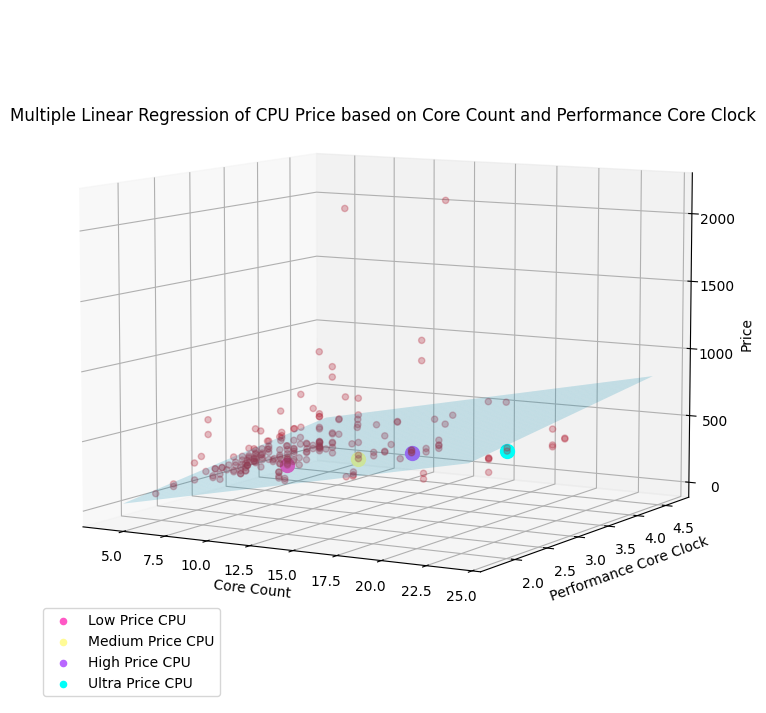

In [353]:
#above plot but use the parts_analysis colors
fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Core_Count'],df['Performance_Core_Clock'],df['Price'],c='#b42a3d', marker='o', alpha=0.3)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='#0190ba', alpha=0.2)
ax.set_xlabel('Core Count')
ax.set_ylabel('Performance Core Clock')
ax.set_zlabel('Price')
ax.view_init( elev=8)
ax.scatter(best_low_cpu['Core_Count'],best_low_cpu['Performance_Core_Clock'],best_low_cpu['Price'],c ='#ff58c5',s=100)
ax.scatter(best_medium_cpu['Core_Count'],best_medium_cpu['Performance_Core_Clock'],best_medium_cpu['Price'],c="#fffb96",s=100)
ax.scatter(best_high_cpu['Core_Count'],best_high_cpu['Performance_Core_Clock'],best_high_cpu['Price'],c="#b967ff",s=100)
ax.scatter(best_ultra_cpu['Core_Count'],best_ultra_cpu['Performance_Core_Clock'],best_ultra_cpu['Price'],c="#00fff9",s=100)
#create a legend
ax.scatter([],[],[],c="#ff58c5",label='Low Price CPU')
ax.scatter([],[],[],c="#fffb96",label='Medium Price CPU')
ax.scatter([],[],[],c="#b967ff",label='High Price CPU')
ax.scatter([],[],[],c="#00fff9",label='Ultra Price CPU')
#put the legend to the lower left
ax.legend(loc='lower left')
#create a title
plt.title('Multiple Linear Regression of CPU Price based on Core Count and Performance Core Clock')
#move the title down
plt.title('Multiple Linear Regression of CPU Price based on Core Count and Performance Core Clock', y=.9)
plt.show()


# GPU MLR

In [354]:
df = pd.read_csv('PC_Part_Picker_Datasets\GPU_Data.csv')
df

,Name,Chipset,Memory,Core Clock,Boost Clock,Length,Rating,Rating Count,Price
0,MSI GeForce RTX 3060 Ventus 2X 12G,GeForce RTX 3060 12GB,12.0,1320 MHz,1777 MHz,235 mm,5,26,309.99
1,Gigabyte WINDFORCE OC,GeForce RTX 4070,12.0,1920 MHz,2490 MHz,261 mm,5,18,549.99
2,Asus DUAL OC,GeForce RTX 4060,8.0,1830 MHz,2535 MHz,227 mm,5,4,304.99
3,Asus ROG STRIX GAMING OC,GeForce RTX 4090,24.0,2235 MHz,2640 MHz,358 mm,5,8,2423.90
4,PNY VCNRTX6000ADA-PB,RTX 6000 Ada Generation,48.0,915 MHz,2505 MHz,267 mm,0,0,9999.00
...,...,...,...,...,...,...,...,...,...
1056,ATI FirePro S7000,FirePro S7000,4.0,950 MHz,NaN,292 mm,0,0,299.99
1057,HP C2J94AT,Quadro K4000,3.0,810 MHz,NaN,241 mm,0,0,199.99
1058,ATI 100-505553,FirePro V5700,0.5,NaN,NaN,NaN,0,0,129.99
1059,ATI FirePro RG220A,FirePro RG220A,0.5,800 MHz,NaN,168 mm,0,0,120.00
